In [38]:
# Librerias requeridas
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Clásicas de ciencia de datos 
import pandas as pd 
import numpy as np 
from datetime import datetime

# Escalado de datos 
from sklearn.preprocessing import StandardScaler

# Visualización 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Algoritmos para los modelos 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Visualizar todo el dataframe de izquierda a derecha
from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)

# Métricas de desempeño
from sklearn.metrics import r2_score

# Actualizar el archivo de funciones
import importlib 
import A_Funciones as funciones # Este archivo contiene las funciones a utilizar
importlib.reload(funciones) # Actualiza los cambios en el archivo de las funciones

<module 'A_Funciones' from 'c:\\Users\\gvand\\Desktop\\Proyecto_Salud\\A_Funciones.py'>

In [4]:
# Importamos los datos preprocesados
df_final = joblib.load('Salidas\\df_final.pkl')
pd.options.display.max_columns = None

**Obtener dummies**

In [5]:
df_final = pd.get_dummies(df_final)
df_final = df_final.astype(int)
df_final

,Saturación de oxigeno,PerÃ­metro Muslo,PerÃ­metro Cintura,Sumatoria Pliegues,Presion arterial sistolica,Presion arterial diastolica,Frecuencia Cardia­aca en reposo,Auto-calificacion Nivel de Ejercicio,Indice metabolico,Maxima capacidad de oxigeno,Ãndice de Fragilidad Groningen,Glicemia,Hemoglobina Glicada,Lipoproteina,HDL,Colesterol total,Trigliceridos,Creatinina 1 consulta,TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Creatinina 2 consulta,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,EDAD_2,SERVICIO HABILITADO COD,Horas_estancia,IMC_Bajo,IMC_Normal,IMC_Obesidad Grasa,IMC_Sobrepeso,Calificacion velocidad_Aceptable,Calificacion velocidad_Bueno,Calificacion velocidad_Deficiente,Calificacion velocidad_Malo - FrÃ¡gil,Tiene HTA_No,Tiene HTA_Si,Tiene EPOC_EPOC no espirometrico,Tiene EPOC_No,Tiene EPOC_Si,Tiene EPOC_Sospecha,Insuficiencia cardiaca_Controlada,Insuficiencia cardiaca_Deterioro de c. funcional,Insuficiencia cardiaca_No,Insuficiencia cardiaca_No aplica,Insuficiencia cardiaca_No controlada,Insuficiencia cardiaca_Signos de sobrecarga,Arritmia o paciente con dispositivo_No,Arritmia o paciente con dispositivo_Si,Sufre de alguna enfermedad cardiovascular_No,Sufre de alguna enfermedad cardiovascular_Si,Tabaquismo_Ex-fumador,Tabaquismo_No,Tabaquismo_Si,Estadio de la Enfermedad Renal_Estadio 0,Estadio de la Enfermedad Renal_Estadio 1,Estadio de la Enfermedad Renal_Estadio 2,Estadio de la Enfermedad Renal_Estadio 3A,Estadio de la Enfermedad Renal_Estadio 3B,Estadio de la Enfermedad Renal_Estadio 4,Estadio de la Enfermedad Renal_Estadio 5,Clase Funcional_Clase Funcional 1,Clase Funcional_Clase Funcional 2A,Clase Funcional_Clase Funcional 2B,Clase Funcional_Clase Funcional 3,RemisiÃ³n_Grupal 1,RemisiÃ³n_Grupal 2,RemisiÃ³n_Grupal 3,RemisiÃ³n_Grupal 4,Diagnostico_Diabetes,Diagnostico_Hipertensión,SEXO_F,SEXO_M,MUNICIPIO_BELLO,MUNICIPIO_ENVIGADO,MUNICIPIO_ITAGUI,MUNICIPIO_LA ESTRELLA,MUNICIPIO_MEDELLIN,MUNICIPIO_SABANETA,MUNICIPIO_SAN ANTONIO DE PRADO,MUNICIPIO_SAN CRISTOBAL,MUNICIPIO_VEREDA LA MARIA,MUNICIPIO_VEREDA YARUMALITO,PRIMERA CLASE FUNCIONAL_Clase Funcional 1,PRIMERA CLASE FUNCIONAL_Clase Funcional 2A,PRIMERA CLASE FUNCIONAL_Clase Funcional 2B,PRIMERA CLASE FUNCIONAL_Clase Funcional 3,PRIMERA CLASE FUNCIONAL_Clase Funcional 4,PRIMERA CLASE FUNCIONAL_Sin clasificar,ÚLTIMA CLASE FUNCIONAL_Clase Funcional 2A,ÚLTIMA CLASE FUNCIONAL_Clase Funcional 2B,ÚLTIMA CLASE FUNCIONAL_Clase Funcional 3,ÚLTIMA CLASE FUNCIONAL_Clase Funcional 4,ÚLTIMA CLASE FUNCIONAL_Sin clasificar,SERVICIO HABILITADO_Cuidado Intensivo Adultos,SERVICIO HABILITADO_Cuidado Intermedio Adultos,SERVICIO HABILITADO_General adultos,SERVICIO HABILITADO_Urgencias >= 24 horas,SERVICIO ADMITE_Ambulatoria Personal,SERVICIO ADMITE_Ambulatoria Programada,SERVICIO ADMITE_Cirugía,SERVICIO ADMITE_Hospitalización,SERVICIO ADMITE_Urgencias Generales Piso 1,SERVICIO ADMITE_Urgencias Generales Sótano,SERVICIO ADMITE_Urgencias Maternas,VIA INGRESO_Consulta Externa ó Programada,VIA INGRESO_Remitido,VIA INGRESO_Urgencias,BLOQUE_Bloque 1,BLOQUE_Bloque 3,UNIDAD ESTRATEGICA_Apoyo Terapeutico,UNIDAD ESTRATEGICA_CUIDADOS ESPECIALES,UNIDAD ESTRATEGICA_Hospitalizacion Adultos,UNIDAD ESTRATEGICA_UCI Adultos,UNIDAD ESTRATEGICA_Urgencias,PISO_Piso 1,PISO_Piso 10,PISO_Piso 2,PISO_Piso 3,PISO_Piso 4,PISO_Piso 5,PISO_Piso 6,PISO_Piso 7,PISO_Piso 8,PISO_Piso 9,PISO_Urgencias,SERVICIO EGRESO_Camillas SAI Adultos,SERVICIO EGRESO_Camillas Sala 1 Urgencias,SERVICIO EGRESO_Camillas Sala 2 Urgencias,SERVICIO EGRESO_Camillas Sala 3 Urgencias,SERVICIO EGRESO_Camillas Sala 4 Urgencias,SERVICIO EGRESO_Camillas Sala 5 Urgencias,SERVICIO EGRESO_Camillas Sala 6 Urgencias,SERVICIO EGRESO_Camillas Sala 7 Urgencias,SERVICIO EGRESO_Camillas Sala 8 - Blanca,SERVICIO EGRESO_Camillas Sala 8 Urgencias,SERVICIO EGRESO_Camillas Sala Remitidos,SERVICIO EGRESO_ERA,SERVICIO EGRESO_ERA 1,SERVICIO EGRESO_ERA 2,SERVICIO EGRESO_Expansión,SERVICIO EGRESO_Fast track 1,SERVICIO

In [6]:
# Separamos nuestra variable objetivo de las demás 
y0 = df_final.Horas_estancia
X1 = df_final.loc[:,~df_final.columns.isin(['Horas_estancia'])]

# Escalamos variable dependiente
scaler = StandardScaler()
y = pd.DataFrame(y0)
scaler.fit(y)
y = scaler.transform(y)

# Escalamos variables independientes
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)
X = pd.DataFrame(X2, columns = X1.columns)

c:\Users\gvand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


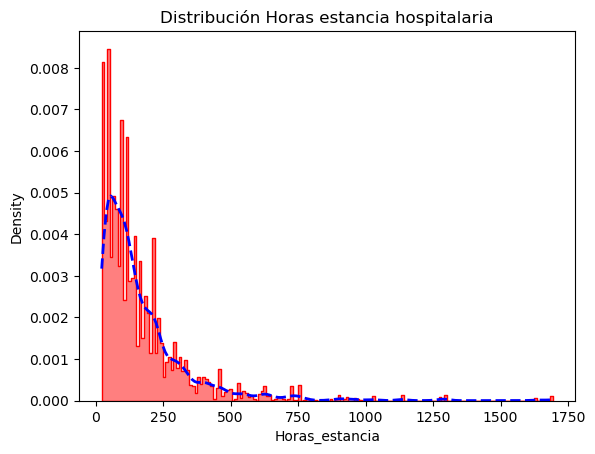

In [7]:
# Distribución de la variable objetivo
sns.histplot(x = y0, element = "step",  stat = "density", color = "red", 
             alpha = 0.5, kde = True, 
             line_kws = {'linestyle':'dashed', 'linewidth':'2'}).lines[0].set_color('blue')
plt.title('Distribución Horas estancia hospitalaria')
plt.show()

El comportamiento de la distribución de la variable objetivo, al no comportarse de manera normal, no se debería implementar con un modelo de regresión lineal

**Modelos propuestos**

Evaluación de modelos Random forest, Decision Tree Regressor y XGBoosst 

In [8]:
# Random forest - Decision Tree Regressor - XGBoosst 
m_rf = RandomForestRegressor() 
m_dt = DecisionTreeRegressor()
m_xg = XGBRFRegressor()

modelos = [m_rf, m_dt,  m_xg]

**Selección de variables**

In [9]:
var_names = funciones.sel_variables(modelos, X, y, '1.25*mean')
X_sel = X[var_names]

c:\Users\gvand\Desktop\Proyecto_Salud\A_Funciones.py:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X,y)


Se mide el desempeño de los modelos para el conjunto de variables seleccionadas y para el conjunto de datos completo 


In [10]:
# Desempeño para el conjunto de datos completo
m_all = funciones.medir_modelos(modelos, 'r2', X, y, 5)

# Desempeño con las variables seleccionadas
m_var_sel = funciones.medir_modelos(modelos, 'r2', X_sel, y, 5)

c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

**Evaluación de modelos, K-Nearest-Neighbor y Support vector machines**

In [11]:
# K-Nearest-Neighbor - Support vector machines
m_knn = KNeighborsRegressor()
m_svm = svm.SVR()

In [12]:
# Desempeño con todo el conjunto de datos
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

m_all0 = pd.DataFrame()
modelos = [m_knn, m_svm]

for modelo in modelos:
    scores = cross_val_score(modelo, X, y, scoring = 'r2', cv = 5 )
    pdscores = pd.DataFrame(scores)
    m_all0 = pd.concat([m_all0,pdscores], axis = 1)

m_all0.columns = ['K-Nearest-Neighbor', "Support Vector Machines"]

c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [13]:
m_var_sel0 = pd.DataFrame()
modelos = [m_knn, m_svm]

for modelo in modelos:
    scores = cross_val_score(modelo, X_sel, y, scoring = 'r2', cv = 5 )
    pdscores = pd.DataFrame(scores)
    m_var_sel0 = pd.concat([m_var_sel0, pdscores], axis = 1)

m_var_sel0.columns = ['K-Nearest-Neighbor', "Support Vector Machines"]

c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gvand\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

**Resumen del desempeño de los modelos**

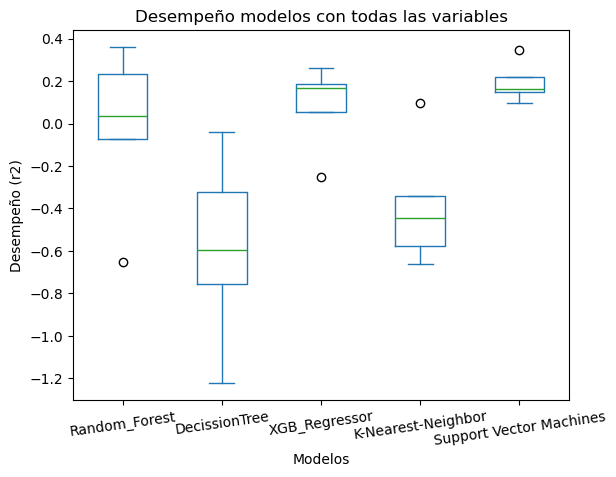

In [14]:
# Desempeño modelos con todas las variables
resultados_var_all = pd.concat([m_all, m_all0], axis = 1)
resultados_var_all.plot(kind = 'box')
plt.title("Desempeño modelos con todas las variables")
plt.xlabel('Modelos')
plt.ylabel('Desempeño (r2)')
plt.tick_params(axis='x', rotation = 8)
plt.show()

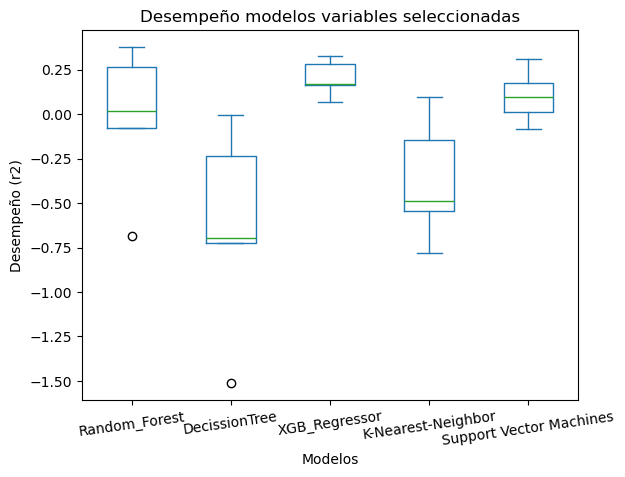

In [15]:
# Desempeño modelos con las variables seleccionadas 
resultados_var_sel = pd.concat([m_var_sel, m_var_sel0], axis = 1)
resultados_var_sel.plot(kind = 'box')
plt.title("Desempeño modelos variables seleccionadas")
plt.xlabel('Modelos')
plt.ylabel('Desempeño (r2)')
plt.tick_params(axis='x', rotation = 8)
plt.show()

In [16]:
resultados_var_sel.mean()

Random_Forest             -0.020658
DecissionTree             -0.635693
XGB_Regressor              0.202564
K-Nearest-Neighbor        -0.372693
Support Vector Machines    0.102635
dtype: float64

In [17]:
resultados_var_all.mean()

Random_Forest             -0.019567
DecissionTree             -0.586891
XGB_Regressor              0.084322
K-Nearest-Neighbor        -0.385280
Support Vector Machines    0.194155
dtype: float64

El modelo ganandor es el XGB_Regressor con seleccion de variables; tiene mejores metricas y en el grafico de cajas es el mas cercano a 1

**Afinamiento de hiperparámetros**

In [40]:
# Dividir los datos en conjuntos de entrenamiento y prueba; 80% y 20% 
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)

In [41]:
# Definir la cuadrícula de parámetros
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

In [46]:
# Inicializar el modelo XGBRegressor
xgb_model = XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2', verbose=2)

In [47]:
# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='r2', verbose=2)

In [50]:
resultados = grid_search.cv_results_
pd.set_option('display.max_colwidth', 100)

In [51]:
grid_search.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
161,"{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample...",0.978039
80,"{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample...",0.977218
242,"{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample...",0.977128
160,"{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample...",0.974589
241,"{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'subsample...",0.974147
...,...,...
83,"{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample...",0.264906
81,"{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample...",0.264559
2,"{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample...",0.261627
1,"{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample...",0.260314


In [55]:
xgb_final = grid_search.best_estimator_
xgb_final

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluación de modelo**

In [57]:
eval = cross_validate(xgb_final,X_sel,y,cv=5,scoring="r2",return_train_score=True)


#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para RF
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']



In [58]:
train_test_rf

,train_score,test_score
0,0.997652,0.090289
1,0.996411,0.158525
2,0.995736,0.336362
3,0.996358,0.189508
4,0.996766,-0.005344


**Analisis de residuos**

In [59]:
# Predicciones 
predictions = cross_val_predict(xgb_final, X_sel, y, cv = 5)
pred_df = pd.DataFrame(predictions, columns = ['pred'])

In [76]:
# Crear dataframe's
mediana = y0.mean()
d_e = y0.std()

172.20770924312652

In [96]:
# Unión 
pred1 = pd.DataFrame(pred_df['pred']*d_e + mediana)
y0 = pd.DataFrame(y0)
df1 = pd.concat([pred1, y0],axis=1)


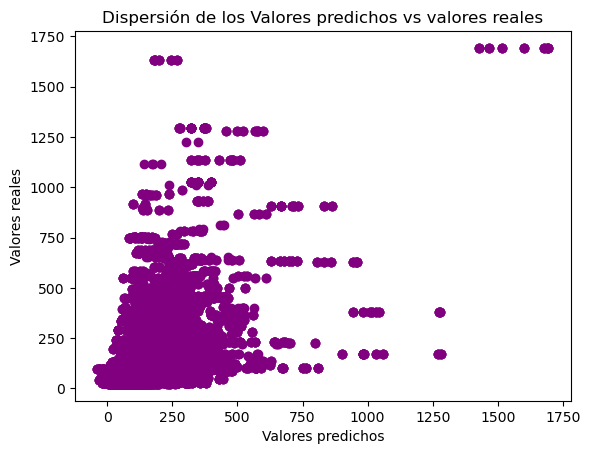

In [87]:
residuos = df1['Horas_estancia']- df1['pred']

# Diagrama de valores predichos vs valores reales
fig, ax = plt.subplots()
ax.scatter(x = df1['pred'], y = df1['Horas_estancia'], c = "purple")
plt.title("Dispersión de los Valores predichos vs valores reales")
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
plt.show()


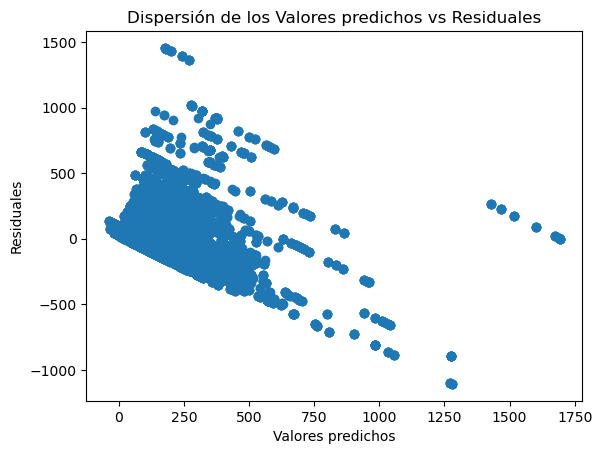

In [88]:
# Diagrama de valores predichos vs residuales
fig, ax = plt.subplots()
ax.scatter(x = df1['pred'], y = residuos)
plt.title("Dispersión de los Valores predichos vs Residuales")
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.show()

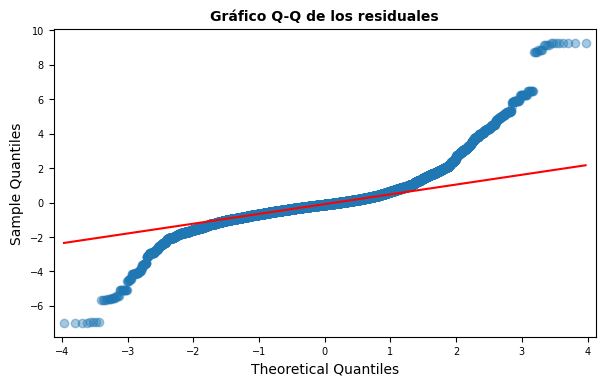

In [95]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize = (7,4))

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de los residuales', fontsize = 10, fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.show()

**Importancia de las variables**

In [89]:
importancia = pd.DataFrame({'variable': X_train.columns, 'peso': xgb_final.feature_importances_})

# Ordenar por importancia
importancia = importancia.sort_values('peso', ascending=False)

# Mostrar las primeras filas (las más importantes)
print(importancia.head())

                                                                variable  \
36       PROFESIONAL ESPECIALIDAD_Cx trasplantes/hepatobiliopancreatrica   
34  PROFESIONAL ESPECIALIDAD_Cirugia Plastica- Maxilofacial y de la Mano   
12                                             DEMORA ASIGNACION CAMA_78   
8                                               DEMORA ASIGNACION CAMA_2   
63                                                 TRANSFUSION SANGRE_SI   

        peso  
36  0.403610  
34  0.143497  
12  0.045527  
8   0.032651  
63  0.032094  


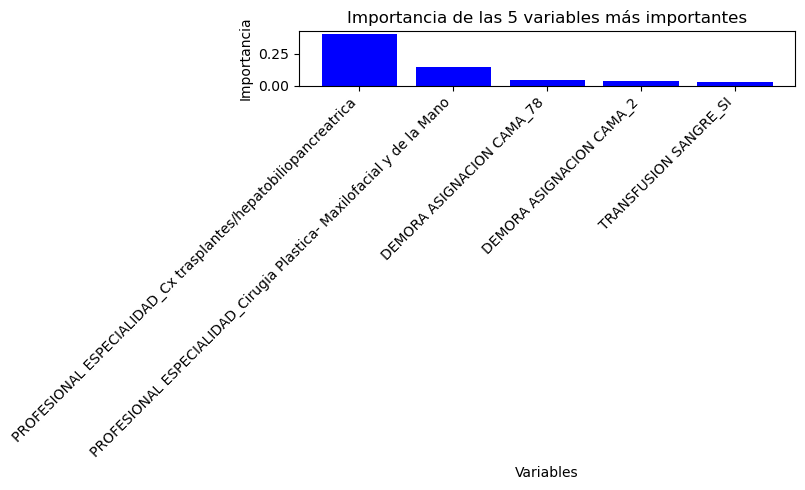

In [94]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(importancia['variable'][:5], importancia['peso'][:5], color='blue')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las 5 variables más importantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()